In [4]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()


In [11]:
with open('tom_1.txt',encoding="utf-8") as f:
    text = f.read().lower()
text = re.sub('[^а-я]','', text)
text

'левтолстойвойнаимиртомтомчастьперваячастьораячастьтретьятомлевниколаевичтолстойвойнаимиртомчастьперваяепоместьямойверныйрабнучтокнязьгенуаилуккасталинебольшекакпоместьямифамилиибонапартенетяваспредупреждаюесливымненескажетечтоунасвойнаесливыещепозволитесебезащищатьвсегадостивсеужасыэтогоантихристаправояверючтоонантихристявасбольшенезнаювыужнедругмойвыужнемойверныйрабкаквыговоритенуздравствуйтездравствуйтеявижучтояваспугаюсадитесьирассказывайтетакговорилавиюлегодаизвестнаяаннапавловнашерерфрейлинаиприближеннаяимператрицымариифеодоровнывстречаяважногоичиновногокнязявасилияпервогоприехавшегонаеевечераннапавловнакашляланесколькоднейунеебылгриппкаконаговорилагриппбылтогдановоесловоупотреблявшеесятолькоредкимивзаписочкахразосланныхутромскраснымлакеембылонаписанобезразличиявовсехилиесливасграфиликнязьнетввидуничеголучшегоиеслиперспективавечераубеднойбольнойнеслишкомваспугаеттоябудуоченьрадавидетьваснынчеусебямеждусемьюидесятьючасамианнашерерокакоежестокоенападениеотвечалнискольконесмутясьтак

In [13]:
language = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(language)}

In [14]:
probabilities = np.zeros((len(language), len(language)))
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
probabilities

array([[4.60360320e-03, 1.88791997e-02, 6.93860387e-02, ...,
        4.13881634e-03, 1.10663539e-02, 4.18750830e-02],
       [7.92302731e-02, 2.04257149e-03, 3.44012040e-03, ...,
        1.93506773e-03, 4.30015051e-04, 3.23586326e-02],
       [1.51792556e-01, 5.40387950e-03, 1.00818647e-02, ...,
        7.37992499e-03, 1.20982377e-04, 3.75045368e-03],
       ...,
       [0.00000000e+00, 6.14250614e-04, 2.45700246e-03, ...,
        6.14250614e-04, 0.00000000e+00, 0.00000000e+00],
       [2.23239840e-02, 7.55580996e-02, 5.29479107e-02, ...,
        6.86891815e-03, 7.15512307e-03, 8.01373784e-03],
       [1.41917896e-02, 2.38133419e-02, 7.20814625e-02, ...,
        6.81526620e-03, 4.81077614e-03, 1.43521488e-02]])

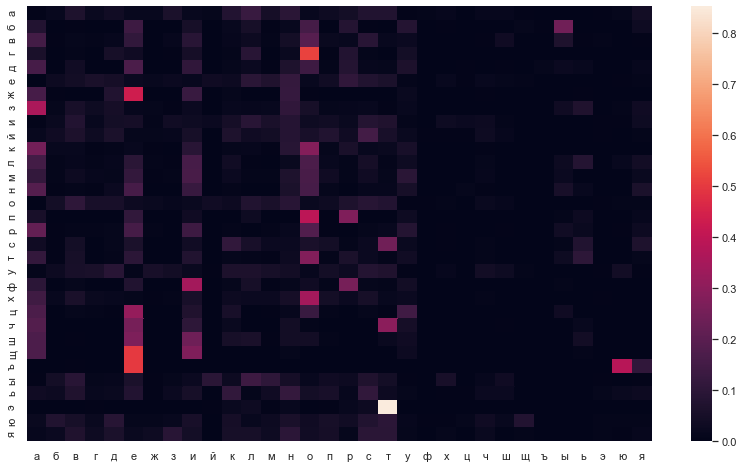

In [28]:
df = pd.DataFrame(probabilities, index=(c for c in language), columns=(c for c in language))
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [34]:
# П**Р
total_prob = 0 #общая вероятность встречи любой из комбинаций п**р
start = POS['п']
end = POS['р']
prior = 1. / len(language) #пусть вероятность обнаружения П зависит только от размера алфавита
#переберем все возможные комбинации, вероятность обнаружения которых равна произведению последовательного обнаружения пар букв
for c in language:
    for d in language:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]]* probabilities[POS[d], end]
        total_prob = total_prob + proba
        if proba > 0:
            print(''.join(['п', c, d, 'р']), proba)
            
print(total_prob)

паар 3.4239036516768477e-07
пабр 2.604626752045215e-06
павр 2.0199179604239483e-06
пагр 2.6893464662191867e-06
падр 5.261363848047914e-06
паер 3.2849846401501667e-06
пазр 1.3799061412727756e-06
паир 6.774264024671444e-07
пайр 6.516398455063341e-07
пакр 7.742415316635625e-06
палр 1.5329293720462014e-06
памр 6.96477216449837e-07
панр 4.0295676542724513e-07
паор 2.033052324953671e-06
папр 1.4817292962361597e-05
парр 1.5148158822667006e-07
паср 1.189782112544552e-06
патр 7.714275960661948e-06
паур 3.250925002248853e-07
пафр 3.6740925456868023e-06
пахр 6.534261496853781e-07
пацр 4.328072539495433e-09
пачр 6.337058750882866e-08
пашр 1.4984002436813787e-08
пащр 7.3918655589605286e-09
паэр 1.3594046938465655e-07
паюр 6.827290695530214e-07
паяр 9.313323719964372e-07
пбар 7.963116773522978e-09
пббр 3.80809227174425e-10
пбвр 1.3533295360681794e-10
пбгр 2.2875700995014183e-10
пбдр 2.1584189736014788e-10
пбер 3.3218677746037484e-08
пбзр 6.47887755727818e-12
пбир 2.5566134322120978e-09
пбкр 2.360012

In [16]:
s = []
start = 'б'
s.append(start)
length = 8
#пусть буквы в нашем слове рандомно выбираются из словарика
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(language), p = probabilities[index])
    s.append(next_char)

print (''.join(s))

бийневаха


In [2]:
from hmmlearn.hmm import GaussianHMM
from scipy.stats import boxcox
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [9]:
def tsplot(y, lags = None, figsize = (12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize = figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax = ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

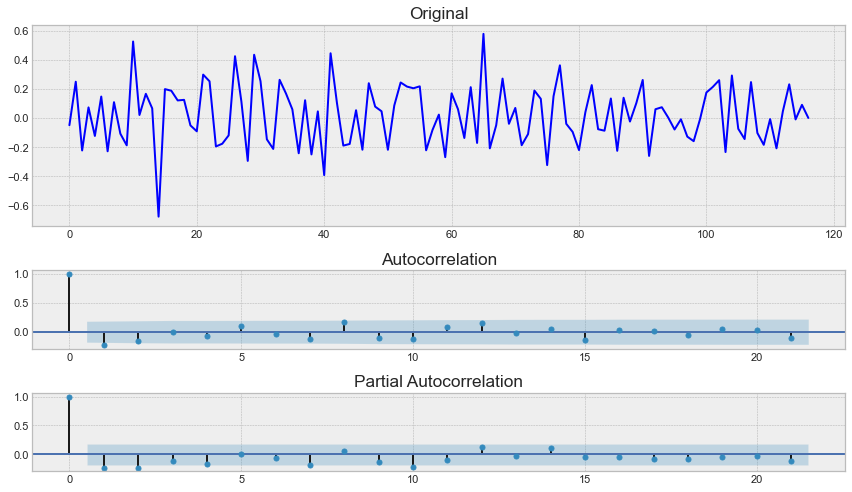

In [10]:
#загрузим временной ряд и приведем его к стационарному виду
series = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")['Count']
series = boxcox(series, 0)
series = series[1:] - series[:-1]
tsplot(series)

In [7]:
values = series.reshape(-1,1)
#рассчитаем ошибку для моделей с разлиным количеством компонентов и выберем оптимальный вариант
for n in range(1, 10):
    model = GaussianHMM(n_components=n, covariance_type="diag", n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 18.727124472456563
2 21.192584149138973
3 25.163163074826237
4 31.502681580881774
5 38.653374104334844
6 43.377644093760665
7 54.140896712570225
8 61.05055342190167
9 66.16591295232767


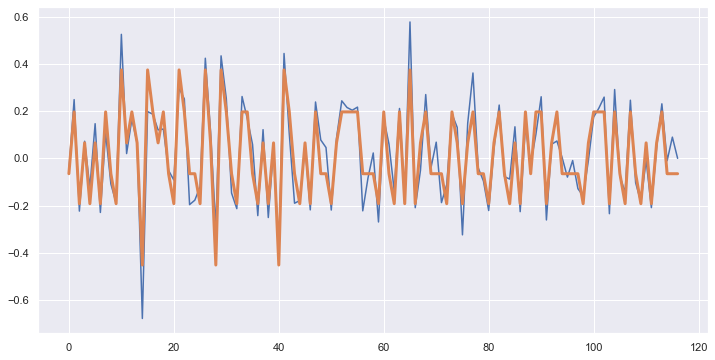

In [8]:
model = GaussianHMM(n_components=6, covariance_type="diag", n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)